# FinTime – Data Understanding
### Project: FinTime – Customer Financial Behavior & Health Intelligence System
### Author: Ujjwal Verma

## Objective
The objective of this notebook is to perform initial data understanding on the
raw transaction dataset. This includes validating dataset structure, data types,
missing values, duplicates, and high-level distributions before proceeding to
data cleaning and transformation.

No modifications are made to the data in this phase.


In [ ]:
import pandas as pd
import numpy as np

# Load raw transaction data
df = pd.read_csv("../../2_Data/Raw_Data/bank_transactions.csv")
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


## Dataset Size

This step helps understand the scale of the dataset by identifying the
number of rows (transactions) and columns (features).


In [ ]:
df.shape

(1048567, 9)

## Dataset Schema and Data Types

Reviewing the dataset schema helps identify:
- Incorrect data types
- Columns requiring type conversion
- Categorical vs numerical attributes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


## Descriptive Statistics

Descriptive statistics provide a high-level understanding of:
- Central tendency of numerical columns
- Spread and variability
- Potential outliers


In [ ]:
df.describe()

,CustAccountBalance,TransactionTime,TransactionAmount (INR)
count,1.046198e+06,1.048567e+06,1.048567e+06
mean,1.154035e+05,1.570875e+05,1.574335e+03
std,8.464854e+05,5.126185e+04,6.574743e+03
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.721760e+03,1.240300e+05,1.610000e+02
50%,1.679218e+04,1.642260e+05,4.590300e+02
75%,5.765736e+04,2.000100e+05,1.200000e+03
max,1.150355e+08,2.359590e+05,1.560035e+06


## Data Quality Checks

Next 3 section evaluates:
- Cardinality of columns
- Missing values
- Duplicate records

These checks help assess overall data quality before cleaning.


In [ ]:
df.nunique()

TransactionID              1048567
CustomerID                  884265
CustomerDOB                  17254
CustGender                       3
CustLocation                  9355
CustAccountBalance          161328
TransactionDate                 55
TransactionTime              81918
TransactionAmount (INR)      93024
dtype: int64

In [ ]:
df.isnull().sum()

TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64

In [ ]:
df.duplicated().sum()

np.int64(0)

## Initial Data Assessment Summary

• Dataset contains 1,048,567 transaction records and 9 features.

• Total unique customers: 884,265, indicating multiple transactions per customer.

• Null values exist primarily in demographic fields (DOB, Gender, Location) and account balance.

• No missing values in key analytical fields such as CustomerID, TransactionAmount, or transaction timestamps.

• Data structure supports segmentation and financial behavior modeling.

• Additional feature engineering will be required for churn, CLV, and financial-health scoring.


## Data Type Validation

Explicit inspection of column data types ensures that each feature
is stored in an appropriate format for downstream analysis.


In [ ]:
df.dtypes

TransactionID               object
CustomerID                  object
CustomerDOB                 object
CustGender                  object
CustLocation                object
CustAccountBalance         float64
TransactionDate             object
TransactionTime              int64
TransactionAmount (INR)    float64
dtype: object

## Data Type Observations

- Several columns are currently stored as `object` type and require conversion
  to appropriate numerical or datetime formats.
- `TransactionDate` and `CustomerDOB` should be converted to datetime
  for time-based and age-related analysis.
- `TransactionTime`, currently stored as an integer, can be transformed
  into a time-based feature or extracted as an hour for behavioral analysis.
- Categorical columns such as `CustGender` and `CustLocation` can be converted
  to category dtype to improve memory efficiency.
- Numerical columns such as `TransactionAmount (INR)` and `CustAccountBalance`
  are already stored in appropriate numeric formats.


## Transaction Amount Distribution Analysis

Understanding the distribution of transaction amounts is critical for evaluating
customer spending behavior and assessing data skewness. Since financial transaction
data typically contains extreme values and zero-amount records, a log transformation
is applied to improve interpretability.


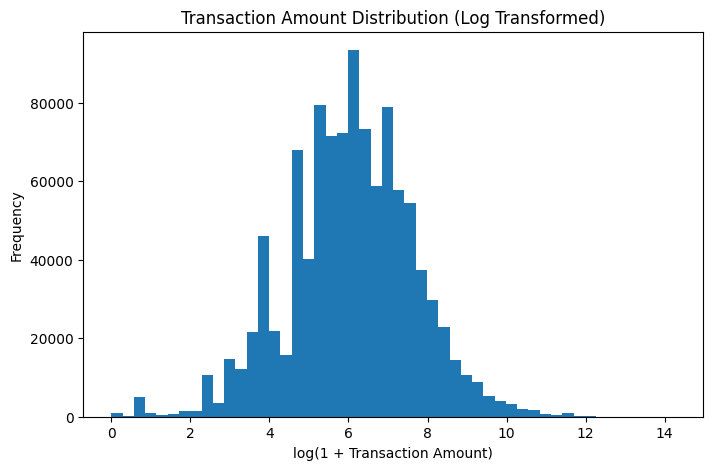

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.hist(np.log1p(df['TransactionAmount (INR)']), bins=50)
plt.title("Transaction Amount Distribution (Log Transformed)")
plt.xlabel("log(1 + Transaction Amount)")
plt.ylabel("Frequency")
plt.show()

## Key Observation

The transaction amount distribution is highly right-skewed, indicating that a small
number of high-value transactions coexist with a large volume of low-value transactions.
The log(1 + x) transformation enables clearer visualization while safely handling
zero-value transactions.

This observed skewness supports the use of median-based imputation and robust
outlier-handling techniques in subsequent data preparation steps.


## Summary of Data Understanding

- The dataset contains transaction-level financial data with sufficient
  volume for analytical use.
- Initial data quality checks reveal the need for data type standardization
  and handling of missing or duplicate records.
- Transaction amounts exhibit a skewed distribution, indicating variability
  in customer spending behavior.
- The dataset is suitable for proceeding to the data cleaning phase.
